## Titanic Template for Exploratory Data Analysis 
#### Writting formulas & Plotting.

#### 1. Load python packages used

In [175]:
# Basic libs
import pandas as pd
import numpy as np
# Loading the plotting libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")

from matplotlib.ticker import StrMethodFormatter
from IPython.display import display, HTML
from IPython.display import Math, Latex
from IPython.display import Image

#### 2. Drawing Formulas

In [176]:
Math(r'F(k) = \int_{-\infty}^{\infty} log(x) . f(x) e^{2\pi k} dx')

<IPython.core.display.Math object>

In [177]:
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")


<IPython.core.display.Latex object>

#### 3. Loading the data.

In [178]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

#### 4. Color Table to use in the plottings.

In [179]:
Image(url='color_table.png', width=700)

#### 5. Palettes = collection of related colors.

https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

#### 6. Exploring and Questions.

##### 6.1. How Age influences the survival of Male and Female.

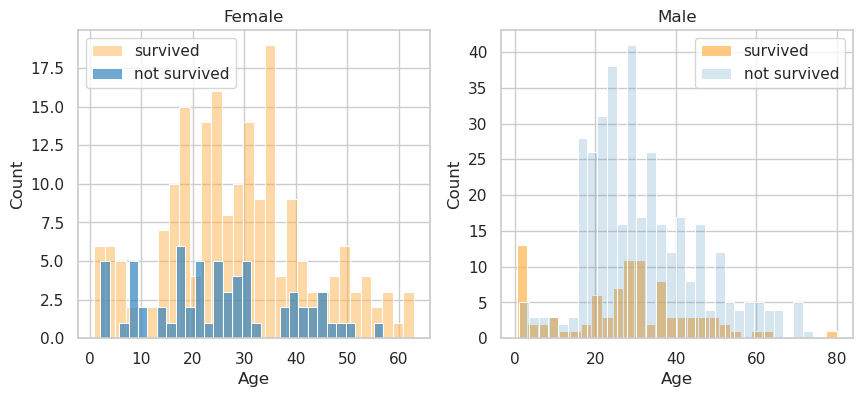

In [180]:
survived = 'survived'
not_survived = 'not survived'
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']
# --- Graphs ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=30, 
                  label=survived, 
                  ax=axes[0], # First plot
                  kde=False, color="#feb24c", alpha=0.5)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[0], kde =False,
                  color="#3182bd", alpha=0.7)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(male[male['Survived']==1].Age.dropna(), bins=30, 
                  label = survived, 
                  ax = axes[1], # Second plot
                  kde = False, color="#feb24c", alpha=0.7)
ax = sns.histplot(male[male['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[1], kde = False,
                  color="#3182bd", alpha=0.2)
ax.legend()
_ = ax.set_title('Male')

##### 6.2. How passenger Age is distributed accross Passenger Classes

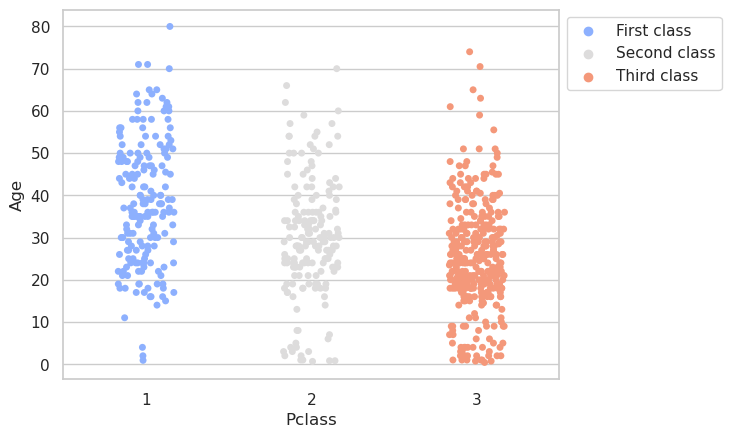

In [181]:
sns.set(style="whitegrid" , color_codes=True)
df_plot = train_df.copy()
p_class_map = {1:'First class', 2:'Second class', 3:'Third class'}
df_plot["Class"] = df_plot["Pclass"].apply(
    lambda x: p_class_map.get(x))
my_plot = sns.stripplot(
    x="Pclass", y="Age", data=df_plot, jitter=0.17, 
    palette=sns.color_palette('coolwarm', n_colors=3), hue="Class")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
my_plot.figure.show()  


#### 6.3 How passenger Age is distributed accross Ticket Classes (Another view)

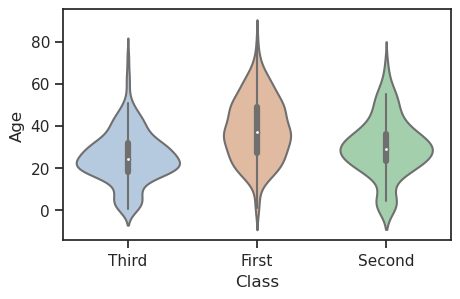

In [182]:
sns.set(style="ticks" , color_codes=True)
df_plot = train_df.copy()
p_class_map = {1:'First', 2:'Second', 3:'Third'}
df_plot["Class"] = df_plot["Pclass"].apply(
    lambda x: p_class_map.get(x))

plt.figure(figsize=(5, 3.0))
sns.violinplot(x="Class", y="Age", palette='pastel', data=df_plot, saturation=0.5)
plt.show()

#### 6.4 Survivability distribution accross Enbarked, Passenger Class and Gender.

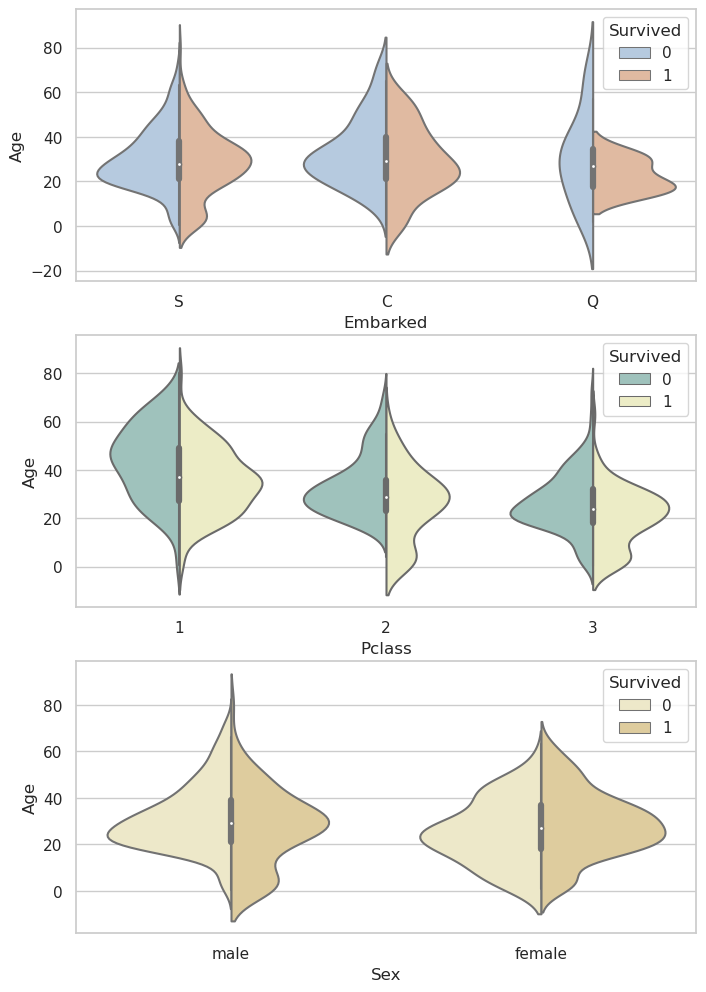

In [183]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))

sns.violinplot(
    x="Embarked", y="Age", hue="Survived", data=train_df, split=True, ax=axes[0], 
    palette='pastel', saturation=0.5)

pal2=sns.color_palette("Set3")
sns.violinplot(
    x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=axes[1],
    palette=pal2, saturation=0.5)

pal3=sns.color_palette("YlOrBr")
sns.violinplot(
    x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=axes[2],
    palette=pal3, saturation=0.5)
plt.show()

#### 6.4. How many people embarked from different ports? 
Is there a correlation between port of embarkment and survival?

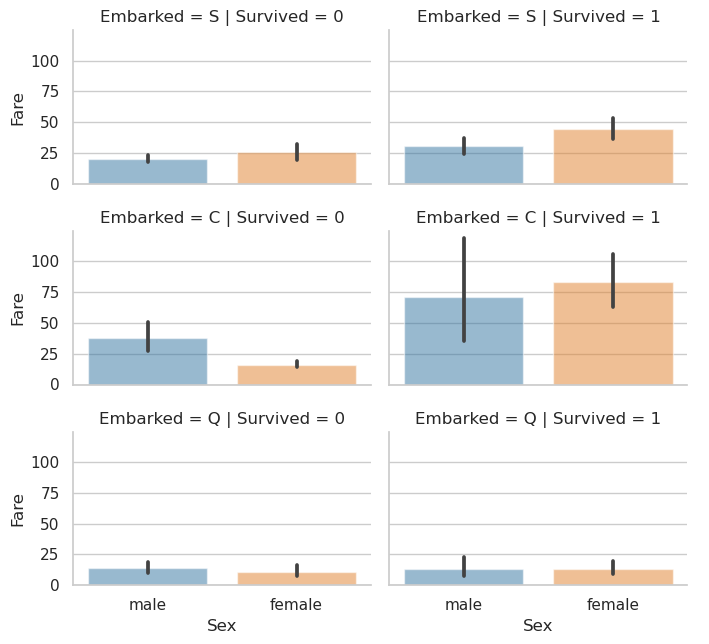

In [184]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', 
      order=["male", "female"],
      palette="tab10",
      alpha=.5)
g.add_legend()
plt.show()

#### 6.5. How the port of embarcation relates with Ticket class?

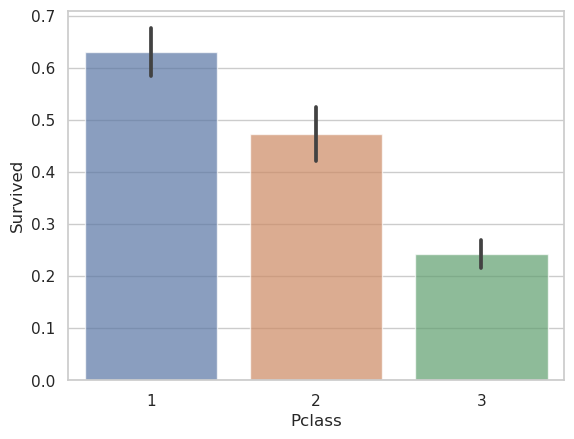

In [185]:
comb = pd.concat([train_df, train_df])
sns.barplot(x='Pclass', y='Survived', data=comb, alpha=.7)
plt.show()

#### 6.6. How the passenger Age relates to the Survival.

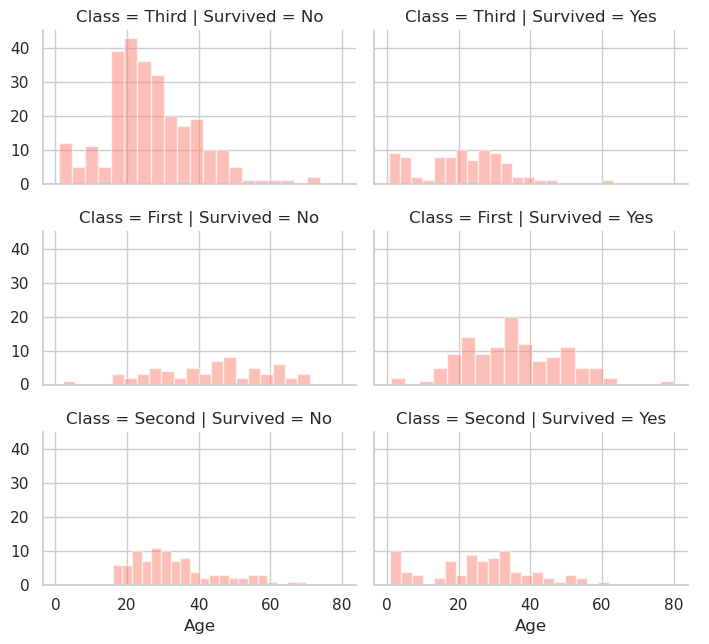

In [186]:
df_plot = train_df.copy()
# Clean survived
survival_map = {1:'Yes', 0:'No'}
df_plot["Survived"] = df_plot["Survived"].apply(lambda x: survival_map.get(x))

# Clean passenger class
p_class_map = {1:'First', 2:'Second', 3:'Third'}
df_plot["Class"] = df_plot["Pclass"].apply(
    lambda x: p_class_map.get(x))

g = sns.FacetGrid(df_plot, col='Survived', row='Class', height=2.2, aspect=1.6)

g.map(plt.hist, 'Age', color="salmon", alpha=.5, bins=20)
g.add_legend()
plt.show()

##### Another way to see a distributuion.

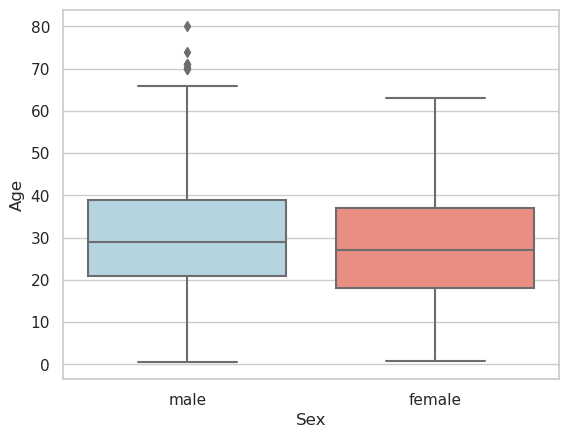

In [187]:
my_palette = {"male": "lightblue", "female": "salmon"}
g = sns.boxplot(train_df, x='Sex', y='Age', palette=my_palette)
plt.show()

##### 6.7. How passenger age relates with Survival and Not Survival

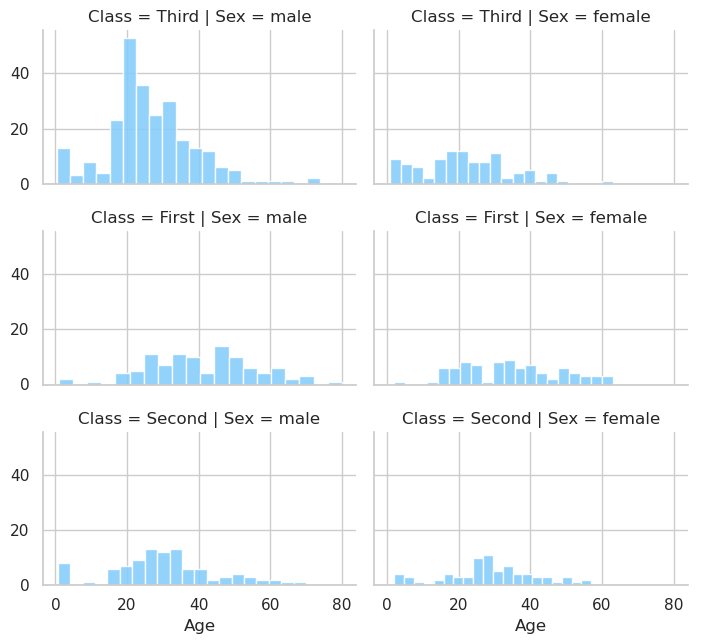

In [188]:
df_plot = train_df.copy()
# Clean survived
survival_map = {1:'Yes', 0:'No'}
df_plot["Survived"] = df_plot["Survived"].apply(lambda x: survival_map.get(x))

# Clean passenger class
p_class_map = {1:'First', 2:'Second', 3:'Third'}
df_plot["Class"] = df_plot["Pclass"].apply(
    lambda x: p_class_map.get(x))


g = sns.FacetGrid(df_plot, row='Class', col='Sex', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', color="lightskyblue", alpha=.9, bins=20)
g.add_legend()
plt.show()

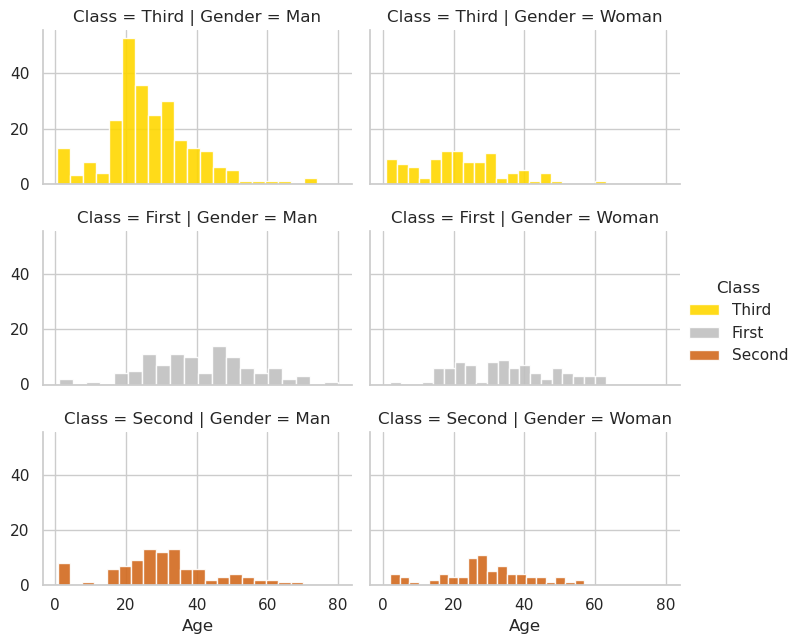

In [189]:
hue_colors = {'color': ['gold', 'silver', 'chocolate']}
df_plot = train_df.copy()
# Clean survived
survival_map = {1:'Yes', 0:'No'}
df_plot["Survived"] = df_plot["Survived"].apply(lambda x: survival_map.get(x))

# Clean passenger class
p_class_map = {1:'First', 2:'Second', 3:'Third'}
df_plot["Class"] = df_plot["Pclass"].apply(
    lambda x: p_class_map.get(x))

# Clean male/female 
p_gender = {'male':'Man', 'female':'Woman'}
df_plot["Gender"] = df_plot["Sex"].apply(
    lambda x: p_gender.get(x))

g = sns.FacetGrid(
    df_plot, row='Class', col='Gender', hue='Class', 
    height=2.2, aspect=1.6,
    hue_kws=hue_colors)
g.map(plt.hist, 'Age',  
      # color="lightskyblue", 
      alpha=.9, bins=20)
g.add_legend()
plt.show()

##### 6.8. How ticket price affects survival of each gender?

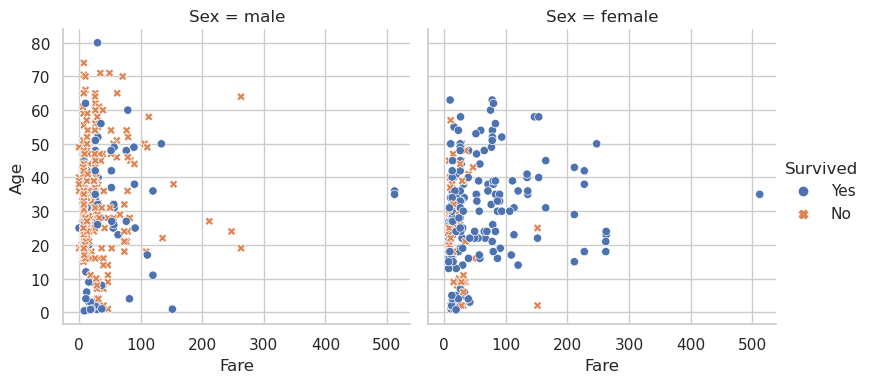

In [190]:
df_plot = train_df.copy()
survival_map = {1:'Yes', 0:'No'}
df_plot["Survived"] = df_plot["Survived"].apply(lambda x: survival_map.get(x))
sns.relplot(
    x="Fare", y="Age", hue="Survived", 
    hue_order=['Yes', 'No'],
    style="Survived", 
    style_order=['Yes', 'No'],
    col="Sex", data=df_plot, height=4);

##### 6.9. Does the size of the group influences chances of survival?

In [191]:
def header(title, width=100):
    fmt_title = '&nbsp;&nbsp;[&nbsp;&nbsp;' + title + '&nbsp;&nbsp;]' + '&nbsp;' * (width - len(title))
    tpl = '<table style="width:{width}"><tr><th>{title}</th></tr></table>'
    html = tpl.format(title=fmt_title, width=width)
    return HTML(html)


data = [(' Train', train_df), (' Test', test_df)]
for label, dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 'Yes'
    counted = dataset['alone'].value_counts().to_frame()
    counted.reset_index(inplace=True)
    counted.columns = ['Alone', 'Count']
    display(header(label, 70))
    # display(counted)
    display(HTML(counted.to_html(index=False)))
    


[ Train ]


Alone,Count
Yes,537
No,354


[ Test ]


Alone,Count
Yes,253
No,165


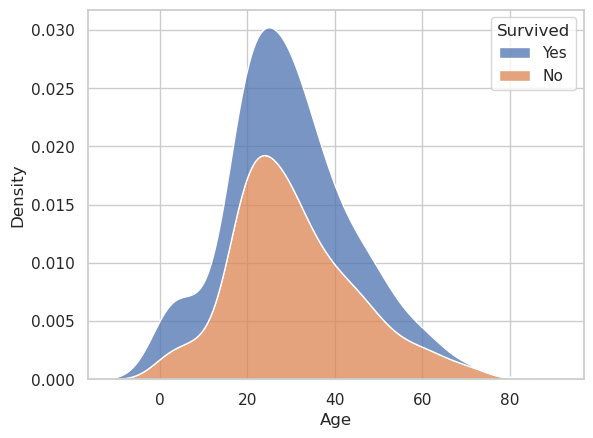

In [192]:
df_plot = train_df.copy()
survival_map = {1:'Yes', 0:'No'}
df_plot["Survived"] = df_plot["Survived"].apply(lambda x: survival_map.get(x))

sns.kdeplot(
    data=df_plot, x="Age", hue="Survived", 
    hue_order=['Yes', 'No'], 
    multiple="stack", )
plt.show()

#### 7. Feature engineering

In [193]:
# Using regex in python
import re
def extract_cabin_prefix(cabin): 
    return re.compile("([a-zA-Z])").search(cabin).group()

def report_extraction(cabin: str) -> None:
    prefix = extract_cabin_prefix(cabin)
    print(f'"{prefix}" is the prefix of "{cabin}"')
    
report_extraction('U1223')
report_extraction('A 13')


"U" is the prefix of "U1223"
"A" is the prefix of "A 13"


##### 7.1 Creating a new field 'Deck'

In [194]:
new_train = train_df.copy()
new_test = test_df.copy()
data = [new_train, new_test]

# Mapping first char to a specific location in the boat.
decks = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
def get_deck(cabin): 
    prefix = extract_cabin_prefix(cabin)
    return decks.get(prefix, 0)

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")   # Setting U0 Cabin if unknown.
    dataset['Deck'] = dataset['Cabin'].map(get_deck)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Drop the 'cabin' column as we already extracted Deck.
new_train = new_train.drop(['Cabin'], axis=1)
new_test = new_test.drop(['Cabin'], axis=1)

In [195]:
import re
# Mapping first char to a specific location in the boat.
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
new_train = train_df
new_test = test_df
data = [new_train, new_test]

def extract_letter_prefix(x):
    return re.compile("([a-zA-Z]+)").search(x).group()

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")   # Setting U0 Cabin if unknown.
    dataset['Deck'] = dataset['Cabin'].map(extract_letter_prefix)
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Drop the cabin as we already extracted Deck.
new_train = new_train.drop(['Cabin'], axis=1)
new_test = new_test.drop(['Cabin'], axis=1)


In [196]:
display(HTML(new_train.head(5).to_html()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,No,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,1,No,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Yes,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,No,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Yes,8


##### 7.2 Checking missing values

In [197]:
new_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
relatives        0
alone            0
Deck             0
dtype: int64


##### 7.3 Fixing the Age variable.

In [198]:
data = [new_train, new_test]

for ds in data:
    # Populate the age with a random distribution centered on 'mean' value with 'std' spread.
    mean = ds["Age"].mean()
    std = ds["Age"].std()
    is_null = ds["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    # Only assign ages larger than 5.
    rand_age = np.maximum([5], np.random.randint(mean - std, mean + std, size = is_null)) 
    # fill NaN values in Age column with random values generated
    age_slice = ds["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    ds["Age"] = age_slice
    ds["Age"] = ds["Age"].astype(int)


In [199]:
# Confirming that is fixed.
new_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
relatives      0
alone          0
Deck           0
dtype: int64

##### 7.4 Fixing the Embarked variable

In [200]:
# Fill the embarked field with the most common value.
most_common_value = new_train['Embarked'].value_counts().idxmax()
print('Most common Port: {0}'.format(most_common_value))

print('--- Train before ---')
print(new_train['Embarked'].describe())
new_train['Embarked'] = new_train['Embarked'].fillna(most_common_value)
print(' ')
print('--- Train after  ---')
print(new_train['Embarked'].describe())

Most common Port: S
--- Train before ---
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
 
--- Train after  ---
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [201]:
# Confirming that is fixed.
new_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
relatives      0
alone          0
Deck           0
dtype: int64

##### 7.4. Alternative to 7.3, Dropping records in __test data__ with NA in the Embark field.

In [202]:
# Another alternative is to drop Empty 'Embarked' fields in the test set.
print(' ')
print('--- Test Data  ---')
print('Before and after removing NAs')
print('# Recs before: {0}'.format(new_test.shape[0]))
new_test = new_test[new_test['Embarked'].notna()]
print('# Recs after : {0}'.format(new_test.shape[0]))
print(' ')

 
--- Test Data  ---
Before and after removing NAs
# Recs before: 418
# Recs after : 418
 


##### 7.5 Adjusting the fare feature

In [166]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  alone        891 non-null    object 
 13  Deck         891 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 97.6+ KB


__Fare fix:__
Convert the “Fare” field from float to integer (int64), using the “astype()” function pandas provides:

__Another possible fix__: In case of missing fares, we set the 'fare' to the 'mean fare' value. 

In [203]:
print('--- Operations ---')
print('1. Set train Fare to average fare')
mean_fare = dataset["Fare"].mean()
new_train['Fare'] = new_train['Fare'].fillna(mean_fare).astype(int)

print('2. Drop test records with empty Fare')
new_test = new_test[new_test['Fare'].notna()]
new_test['Fare'] = new_test['Fare'].astype(int)

print(' ')
print('--- Train data ---')
print('# Recs before cleanup : {0}'.format(new_test.shape[0]))
print('# Recs after cleanup  : {0}'.format(new_test.shape[0]))


--- Operations ---
1. Set train Fare to average fare
2. Drop test records with empty Fare
 
--- Train data ---
# Recs before cleanup : 417
# Recs after cleanup  : 417


##### 7.6 Creating a new feature 'Family Size'.

In [204]:
data = [new_train,  new_test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

def format_percent(value):
    return '{:,.1f}'.format(value * 100)

grouped = new_train[['FamilySize', 'Survived']].groupby(
    ['FamilySize'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)
grouped['Survived'] = grouped['Survived'].map(format_percent)

tabulated = grouped.rename(columns={
    'FamilySize': 'Family Size', 'Survived': 'Survided %'})
tabulated.style.hide(axis="index") 


Family Size,Survided %
4,72.4
3,57.8
2,55.3
7,33.3
1,30.4
5,20.0
6,13.6
8,0.0
11,0.0


##### 7.7 Making the 'Port of embarkation' values clear

In [68]:
def get_port_name(code):
    ports = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
    return ports.get(code, '<Unknown>')


group_embarked = new_train[['Embarked', 'Survived']].groupby(
    ['Embarked'], as_index=False).mean().sort_values(
        by='Survived', ascending=False)
group_embarked['Survived'] = group_embarked['Survived'].map(format_percent)
group_embarked['Embarked'] = group_embarked['Embarked'].map(get_port_name)

tabulated = group_embarked.rename(columns={
    'Embarked': 'Port of embarkation', 'Survived': '% Survided'})
tabulated.style.hide(axis="index") 


Port of embarkation,% Survided
Cherbourg,55.4
Queenstown,39.0
Southampton,33.9


##### 7.8 Creating a new feature 'IsAlone'

In [70]:
def get_is_alone_str(is_alone):
    values = {0: 'No', 1: 'Yes'}
    return values.get(is_alone, '<Unknown>')


new_train['IsAlone'] = 0
new_train.loc[new_train['FamilySize'] == 1, 'IsAlone'] = 1

group_is_alone = new_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
group_is_alone['Survived'] = group_is_alone['Survived'].map(format_percent)
group_is_alone['IsAlone'] = group_is_alone['IsAlone'].map(get_is_alone_str)
tabulated = group_is_alone.rename(columns={
    'IsAlone': 'Is passenger alone', 'Survived': '% Survided'})
tabulated.style.hide(axis="index") 


Is passenger alone,% Survided
No,50.6
Yes,30.4


#### 8. Additional Plottings.

##### 8.1 Correlation of variables in the dataframe.

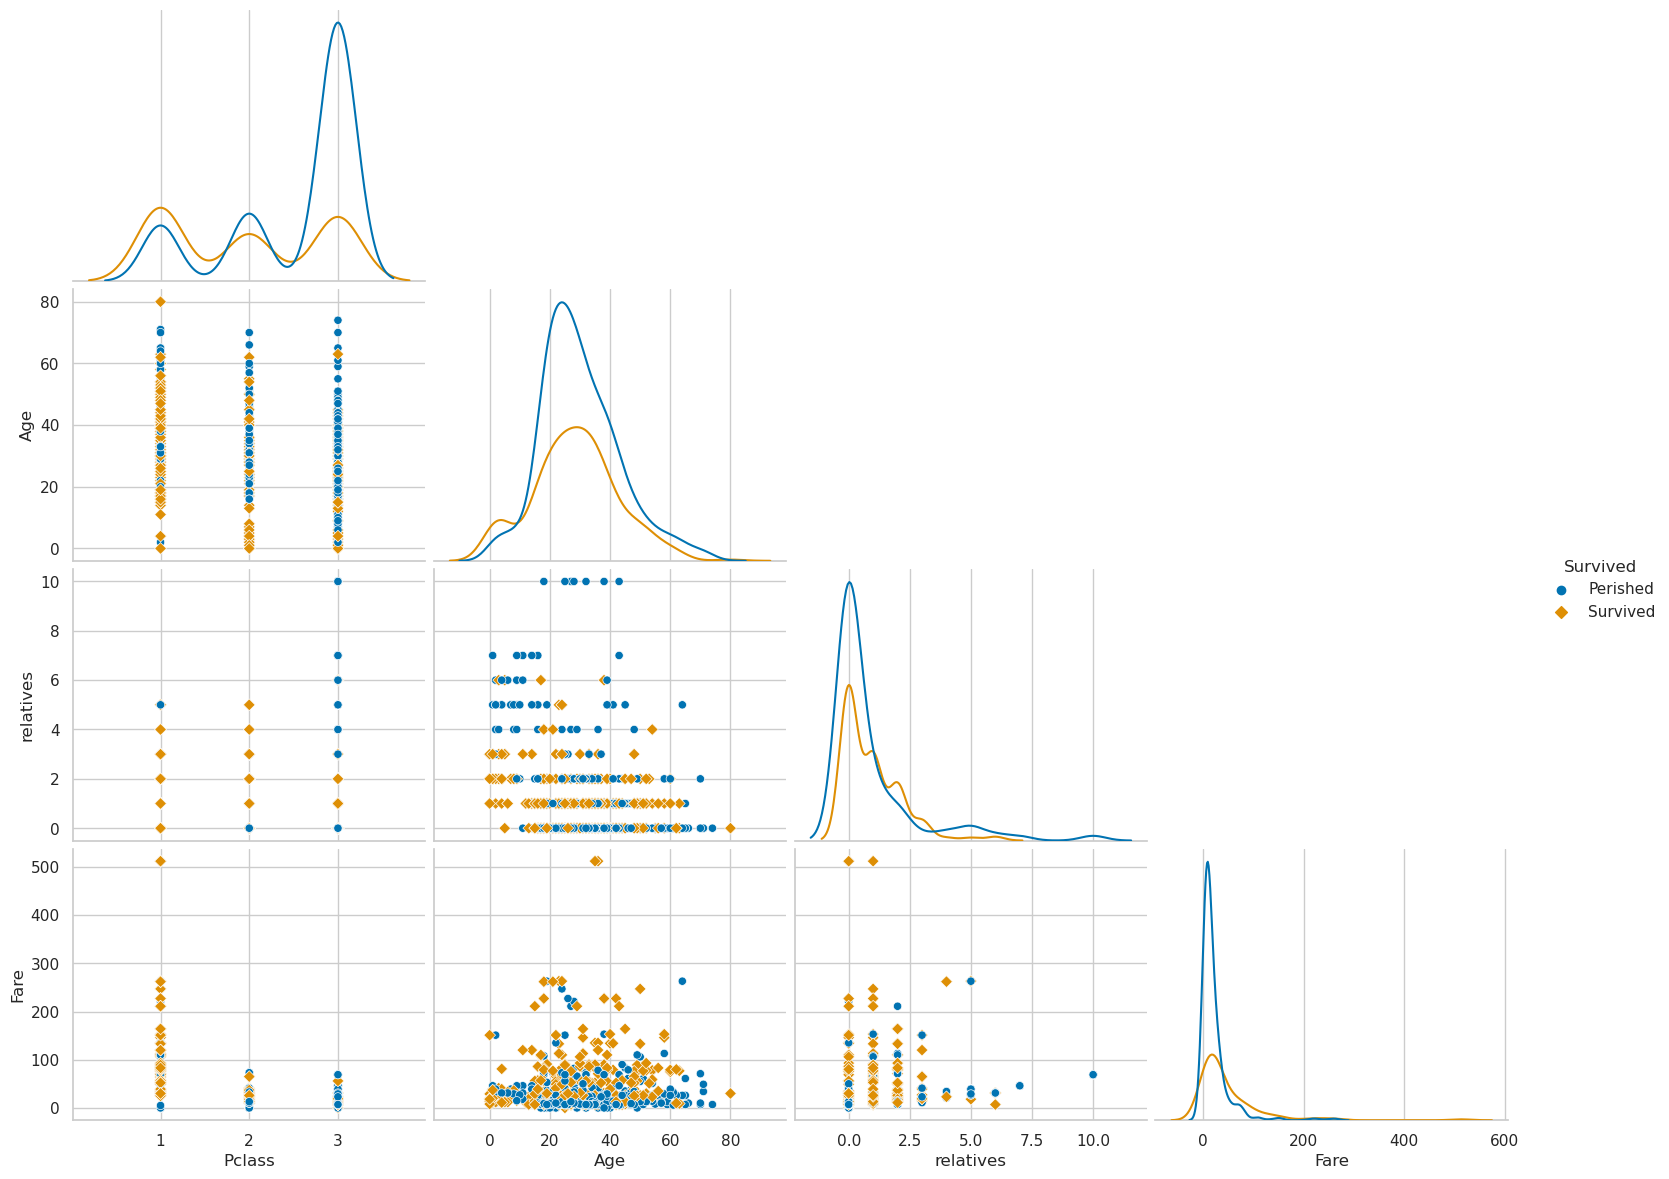

In [71]:
pairs_df = new_train[
    ['Pclass', 'Age', 'relatives', 'Fare', 'Survived']].copy()
survived_map =  {0: 'Perished', 1: 'Survived'}
pairs_df['Survived'] = pairs_df['Survived'].map(survived_map)
p = sns.pairplot(
    pairs_df, palette='colorblind', hue='Survived', corner=True,
    diag_kws=dict(fill=False), markers=["o", "D"], height=3, aspect=1.3) 
plt.show()

##### 8.2. 'Heatmap' plot from the various pairs

In [208]:
# Numeric Features
numeric_features = ['Age', 'Fare']
# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']
cor_matrix = new_train[numeric_features + ordinal_features].corr().round(3)

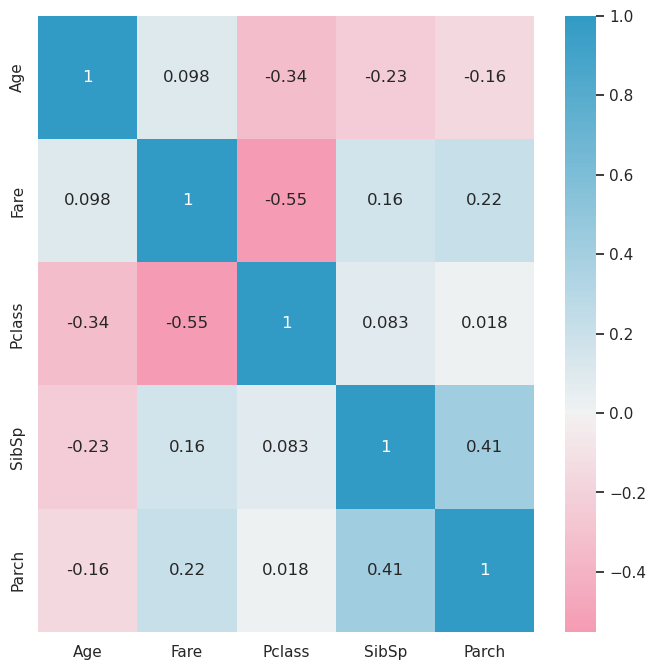

In [211]:
# Draw a heatmap 
fig = plt.figure(figsize=(8,8));
sns.heatmap(cor_matrix, annot=True, center=0, 
            cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True),
            ax=plt.subplot(111));
plt.show()

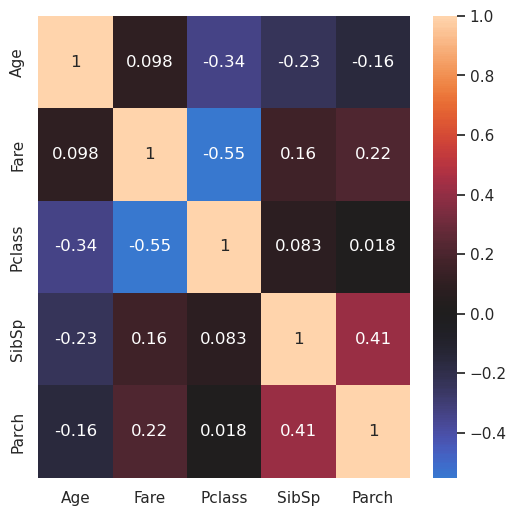

In [214]:
# Another set of colors
fig = plt.figure(figsize=(6,6))
sns.heatmap(cor_matrix, annot=True, center=0, 
            # cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True),
            ax=plt.subplot(111))
plt.show()

#### 9. Model Building

In [215]:
# Load ML Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##### 9.1 Data preparation for loading into a model.

In [216]:
# Make sure we get reproducible results.
import random
random.seed(1234)

def model_x_df(df):
    '''Build the x dataset ready to use in models''' 
    predictors = ['Pclass', 'Age', 'Parch', 'Fare', 'relatives']
    data_x = df[predictors].copy()
    data_sex_x = pd.get_dummies(df.Sex, prefix='sex')
    data_alone_x = pd.get_dummies(df.alone, prefix='alone')
    data_embarked_x = pd.get_dummies(df.Embarked, prefix='emb')
    data_deck_x = pd.get_dummies(df.Deck, prefix='deck')
    result = pd.concat(
        [data_x, data_sex_x, data_alone_x, data_embarked_x, data_deck_x], axis=1)
    required_fields = [
        'Pclass', 'Age', 'Parch', 'Fare', 'relatives', 
        'sex_female', 'sex_male',
        'alone_No', 'alone_Yes', 
        'emb_C', 'emb_Q', 'emb_S', 
        'deck_0', 'deck_1', 'deck_2', 'deck_3', 'deck_4', 
        'deck_5', 'deck_6', 'deck_7', 'deck_8']
    for req_field in required_fields:
        if req_field not in result.columns:
             result[req_field] = 0
    # Make sure the fields are ordered the same way.
    return result[required_fields]

def model_y_1d(df):
    '''Extract the target values''' 
    return df['Survived'].values.ravel()

train_x = model_x_df(new_train)
train_y = model_y_1d(new_train)

test_x = model_x_df(new_test)
test_y = model_y_1d(new_test)

print(train_x.shape)
print(test_x.shape)

(891, 21)
(417, 21)


##### 9.2 Verifying that the new formatted dataset dont have nulls.

In [217]:
test_x.isnull().sum()

Pclass        0
Age           0
Parch         0
Fare          0
relatives     0
sex_female    0
sex_male      0
alone_No      0
alone_Yes     0
emb_C         0
emb_Q         0
emb_S         0
deck_0        0
deck_1        0
deck_2        0
deck_3        0
deck_4        0
deck_5        0
deck_6        0
deck_7        0
deck_8        0
dtype: int64

In [218]:
train_x.head(5)

,Pclass,Age,Parch,Fare,relatives,sex_female,sex_male,alone_No,alone_Yes,emb_C,...,emb_S,deck_0,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7,deck_8
0,3,22,0,7,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,38,0,71,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,26,0,7,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35,0,53,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3,35,0,8,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


##### Making sure that both test and train datasets have same columns in the same order.

In [222]:
np.all(train_x.columns == test_x.columns)

True

##### 9.2 Creating and Trainning a model.

In [223]:
import random
random.seed(2022)

basic_model = RandomForestClassifier(random_state = 1)
basic_fit = basic_model.fit(train_x, train_y)

In [255]:
def format_score(score):
    return '{0:.2f}%'.format(score*100)

def print_scores(title, scores):
    print(f' --- {title} ---------------------------')
    print(' Mean score      : ' + format_score(scores.mean()))
    fmt_scores = [format_score(sc) for sc in scores]
    print(' Scores by group : ' + ', '.join(fmt_scores))

def print_score(score, header:str='Score'):
    print('{0}: {1}'.format(header, format_score(score)))

In [256]:
# Basic - Cross Validation without optimization
cv_scores = cross_val_score(basic_fit, train_x, train_y, cv=5)
print_scores('Cross-Validation Results', cv_scores)


 --- Cross-Validation Results ---------------------------
 Mean score      : 79.13%
 Scores by group : 75.98%, 78.65%, 79.78%, 78.09%, 83.15%


##### 9.3 Testing the model results before optimization.

In [257]:
# Notice that as expected the score for testing is a little smaller than the score for training.
test_score = basic_fit.score(test_x, test_y)
print('The "Test score" is the most important score!')
print_score(test_score)

The "Test score" is the most important score!
Score: 71.70%


##### 9.4 Optimizing the model.

In [241]:
# Grid Search to find the best Hyper parameters
param_name = 'max_depth'
param_range = [5, 8, 10, 15]
train_scores, cv_test_scores = validation_curve(
    RandomForestClassifier(),
    X = train_x, y = train_y, 
    param_name = param_name, 
    param_range = param_range, cv = 5)

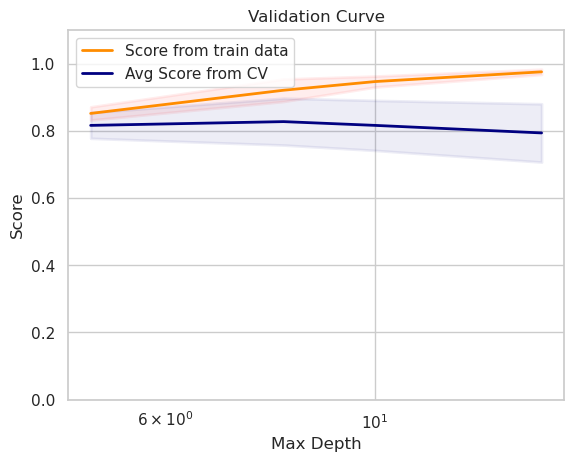

In [242]:
def plot_curve(train_scores, test_scores, title):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    cv_test_scores_mean = np.mean(cv_test_scores, axis=1)
    cv_test_scores_std = np.std(cv_test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(title) 
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Score from train data",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, 
                     train_scores_mean - (3 * train_scores_std) ,
                     train_scores_mean + (3 * train_scores_std) , alpha=0.07,
                     color="red", lw=lw)
    plt.semilogx(param_range, cv_test_scores_mean, label="Avg Score from CV",
                 color="navy", lw=lw)
    plt.fill_between(param_range, cv_test_scores_mean - (3 * cv_test_scores_std),
                     cv_test_scores_mean + (3 * cv_test_scores_std), alpha=0.07,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
plot_curve(train_scores, cv_test_scores, "Max Depth")

In [243]:
def report_best_params(title, bestFit):
    prms = bestFit.best_params_
    spacer = '-' * 40
    print(spacer)
    print(title)
    print(spacer)
    print('  Best Hyperparameter Combination')
    print('  Max Depth = {0}'.format(prms['max_depth']))
    print('  Min Samples Leaf  = {0}'.format(prms['min_samples_leaf']))
    print('  Min Samples Split = {0}'.format(prms['min_samples_split']))
    print('  Number of Estimators = {0}'.format(prms['n_estimators']))


##### 9.5 Define the parameters to search and cross-validation groups

In [244]:
def calculate_number_of_fits(hyper_params_dict, cross_validation=3):
    result = cross_validation
    for group_values in hyper_params_dict.values():
        result *= len(group_values)
    return result


In [245]:
import random
random.seed(2022)
cross_validation = 3
hyper_parameters = dict(
    n_estimators = [700, 800, 900, 1000, 1100], 
    max_depth = [5, 8, 10, 15],  
    min_samples_split = [2, 3, 4, 5, 10, 15, 20], 
    min_samples_leaf = [2, 5, 8, 12])
total_fits_required = calculate_number_of_fits(hyper_parameters, cross_validation)
print(f'Number of fits required = {total_fits_required:,}')


Number of fits required = 1,680


In [246]:
forest_model = RandomForestClassifier(random_state = 1)
grid_search_v1 = GridSearchCV(forest_model, hyper_parameters, cv = cross_validation, verbose = 1, n_jobs = -1)
best_fit_v1 = grid_search_v1.fit(train_x, train_y)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


In [247]:
report_best_params('"Grid Search" optimization - First Round', best_fit_v1)    

----------------------------------------
"Grid Search" optimization - First Round
----------------------------------------
  Best Hyperparameter Combination
  Max Depth = 8
  Min Samples Leaf  = 2
  Min Samples Split = 2
  Number of Estimators = 700


In [248]:
cross_validation = 5
hyper_parameters = dict(
    max_depth = [6, 7, 8, 9, 10],  
    min_samples_leaf = [2, 3, 4, 5],
    min_samples_split = [8, 10, 12],
    n_estimators = [950, 1000, 1050, 1100, 1150, 1200, 1250]
)
total_fits_required = calculate_number_of_fits(hyper_parameters, cross_validation)
print(f'Number of fits required = {total_fits_required:,}')


Number of fits required = 2,100


In [249]:
import random
random.seed(2022)
forest_model = RandomForestClassifier(random_state = 1)
grid_search_v2 = GridSearchCV(forest_model, hyper_parameters, cv = cross_validation, verbose = 1, n_jobs = -1)
best_fit_v2 = grid_search_v2.fit(train_x, train_y)


Fitting 5 folds for each of 420 candidates, totalling 2100 fits


In [250]:
report_best_params('"Grid Search" optimization - Second Round', best_fit_v2)    


----------------------------------------
"Grid Search" optimization - Second Round
----------------------------------------
  Best Hyperparameter Combination
  Max Depth = 10
  Min Samples Leaf  = 2
  Min Samples Split = 8
  Number of Estimators = 1000


In [258]:
prms = best_fit_v2.best_params_
rf_model_final = RandomForestClassifier(
    random_state = 1, 
    max_depth = prms['max_depth'],
    n_estimators = prms['n_estimators'],
    min_samples_split = prms['min_samples_split'],
    min_samples_leaf = prms['min_samples_leaf'])
random_forest = rf_model_final.fit(train_x, train_y)
train_scores = cross_val_score(random_forest, train_x, train_y, cv=5)
print_score(header='CV score after Grid Seach', score=train_scores.mean())

CV score after Grid Seach: 82.72%


In [259]:
test_score = random_forest.score(test_x, test_y)
print('Final score after optimization')
print_score(header='Test Score', score=test_score)

Final score after optimization
Test Score: 74.82%


#### Final Notes:

__A. Cross-Validation scores__

* Notice that the Cross-Validation scores are better than the test scores.
* This is true for the model before optimization and also for the optimized model.
* It is expected to have Test scores a little lower than CS scores. 

__B. Difference between Cross-Validation and test scores__

* A large difference between Cross-Validation scores and the test scores can indicate that the model is overfitting. 
    
__C) Optimization results__

* Test final score improved after the optimization.